### Simple Frequency Table Code
Takes a list (sample), separates them by bins, and gives a frequency table with histogram

In [1]:
#Imports
import pandas as pd
import seaborn as sns

In [2]:
#Give list
sample = [10, 15, 12, 17, 22, 14, 23, 8, 15, 11, 17, 12, 16, 26, 12, 11, 9, 16, 15, 24, 12, 17, 16, 14, 19, 13, 10, 15, 19, 20,
10, 25, 14, 15, 12, 22, 7, 28, 16, 9]

#Put list into df
df = pd.DataFrame(sample, columns=['nums'])

In [3]:
#Set bin sizes
bins = [5, 9, 13, 17, 21, 25, 29]

In [4]:
#Put into dataframe
newdf = pd.DataFrame(pd.cut(df['nums'], bins=bins).value_counts()).sort_index()
newdf.reset_index(inplace=True)

#Convert to String
newdf['index'] = newdf['index'].astype(str)

In [5]:
#Set 'easy-to-read' names for bins
left = newdf['index'].str.split(',').str[0].str.split('(').str[1].astype('int32') + 1
right = newdf['index'].str.split(',').str[1].str.split(']').str[0]

fullname = left.astype(str) + ' -' + right
newdf['index'] = fullname

In [6]:
#cummulative frequency
newdf['cumfreq'] = newdf['nums'].cumsum()

#relative frequency
newdf['relfreq'] = newdf['nums'] / newdf['nums'].sum()

#cummulative relative frequency
newdf['cumrelfreq'] = newdf['relfreq'].cumsum()

#Add column names
newdf.columns =['Class Interval', 'Frequency', 'Cummulative Frequency', 'Relative Frequency', 'Cumulative Relative Frequency']

In [7]:
#Show frequency table
newdf

,Class Interval,Frequency,Cummulative Frequency,Relative Frequency,Cumulative Relative Frequency
0,6 - 9,4,4,0.100,0.100
1,10 - 13,11,15,0.275,0.375
2,14 - 17,15,30,0.375,0.750
3,18 - 21,3,33,0.075,0.825
4,22 - 25,5,38,0.125,0.950
5,26 - 29,2,40,0.050,1.000


<AxesSubplot:xlabel='Class Interval', ylabel='Frequency'>

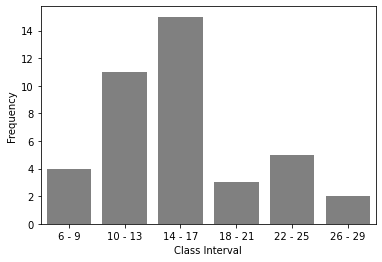

In [8]:
#Plot distribution
sns.barplot(x="Class Interval", y="Frequency", data=newdf, color='grey')